,date,cum_power,new_pw,day_power
0,2017-01-01,20111.0,20111.0,0.0
1,2017-01-02,20112.0,20112.0,1.0
2,2017-01-03,20115.0,20115.0,3.0
3,2017-01-04,20117.0,20117.0,2.0
4,2017-01-05,20119.0,20119.0,2.0
...,...,...,...,...
659,2018-10-22,28101.0,28101.0,6.0
660,2018-10-23,28109.0,28109.0,8.0
661,2018-10-24,28115.0,28115.0,6.0
662,2018-10-25,28117.0,28117.0,2.0


<AxesSubplot: xlabel='date'>

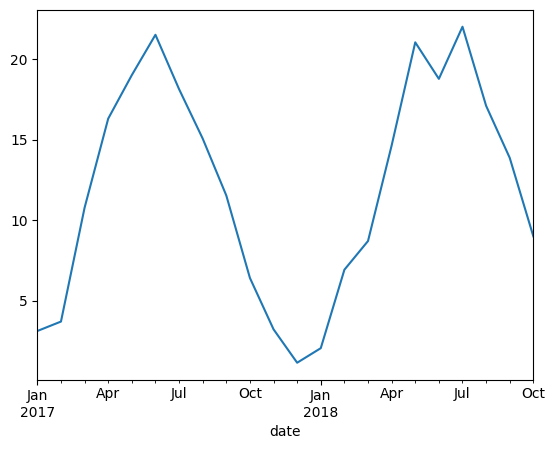

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
solar_data = pd.read_csv('/Users/danilsautenkov/Library/Containers/com.microsoft.Excel/Data/Downloads/solarpower.csv')
def fill(data, ind):
    if data == -1:
        return (solar_data.cum_power.iloc[ind-1]+solar_data.cum_power.iloc[ind+1])/2
    else:
        return data
solar_data['new_pw'] = solar_data.apply(lambda x: fill(x.cum_power, x.name), axis = 1)
a = np.diff(solar_data['new_pw'])
b = np.insert(a, 0, 0)
solar_data['day_power'] = b
display(solar_data)
solar_data['date'] = pd.to_datetime(solar_data['date'])
c =solar_data.groupby(solar_data['date'].dt.to_period('M'))['day_power'].mean()
c.plot()
